# PyTorch: Aprendiendo Fashion-MNIST

## Refs.

* https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html

* https://github.com/zalandoresearch/fashion-mnist

* https://github.com/pranay414/Fashion-MNIST-Pytorch/blob/master/fashion_mnist.ipynb

## **Ejercicio 1)** Importando librerías

**0)** De ser necesario, **instale PyTorch** escribiendo

    !pip3 install torch torchvision torchaudio torchviz

**1)** Importe las librerías estandard de Python: `os`, `datetime`, `collections` y `pickle`.

**2)** Importe las siguientes librerías third party de Python: `matplotlib.pyplot`, `numpy`, `scipy`, `sklearn`, `pandas`, `dill` y `json`.

**3)** Importe las librerias necesarias de **PyTorch**: `torch` y `torchvision`.

**4)** Importe la librería: `google.colab`.

In [ ]:
# 1.0)
!pip3 install torch torchvision torchaudio torchviz

In [ ]:
# 1.1)
import os
import pickle
import datetime
from collections import defaultdict

In [ ]:
# 1.2)
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import sklearn as skl
import pandas as pd
#import dill
import json

In [ ]:
# 1.3)
import torch
import torch.optim as optim
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, Subset, random_split
from torchvision import datasets
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms import ToTensor, Lambda, Compose
#from torchviz import make_dot

In [ ]:
# 1.4)
import google.colab
from google.colab import files

## **Ejercicio 2)**

Bajando y Jugando con el dataset **Fashion-MNIST**.

**1)** Baje y transforme (i.e. normalize los valores al rango [0,1]) los conjuntos de entrenamiento y testeo de FashionMNIST.

**2)** Explore algunos ejemplos de estos conjuntos. Que formato poseen?

**3)** Visitando la página web de FashionMNIST, cree un diccionario de Python `Dict()` asociando cada categoría a un nombre adecuado de la misma.

**4)** Grafique un mosaico de 3x3 imagenes de FashionMNIST, cada una titulada con su respectiva clasificación

In [ ]:
# 2.1)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = datasets.FashionMNIST('MNIST_data/', download=True, train=True, transform=transform)
valid_set = datasets.FashionMNIST('MNIST_data/', download=True, train=False, transform=transform)

In [ ]:
len(train_set), len(valid_set)

(60000, 10000)

In [ ]:
i = np.random.randint(len(valid_set))
img, label = valid_set[i]
img.shape, label

(torch.Size([1, 28, 28]), 7)

In [ ]:
image, label = train_set[0]
print("Formato de la imagen:", image.shape)  # Debe ser torch.Size([1, 28, 28])
print("Etiqueta de la imagen:", label)


Formato de la imagen: torch.Size([1, 28, 28])
Etiqueta de la imagen: 9


AHORA AGREGO UNA CATEGORIA PARA CADA RESULTADO

In [ ]:
categories = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}


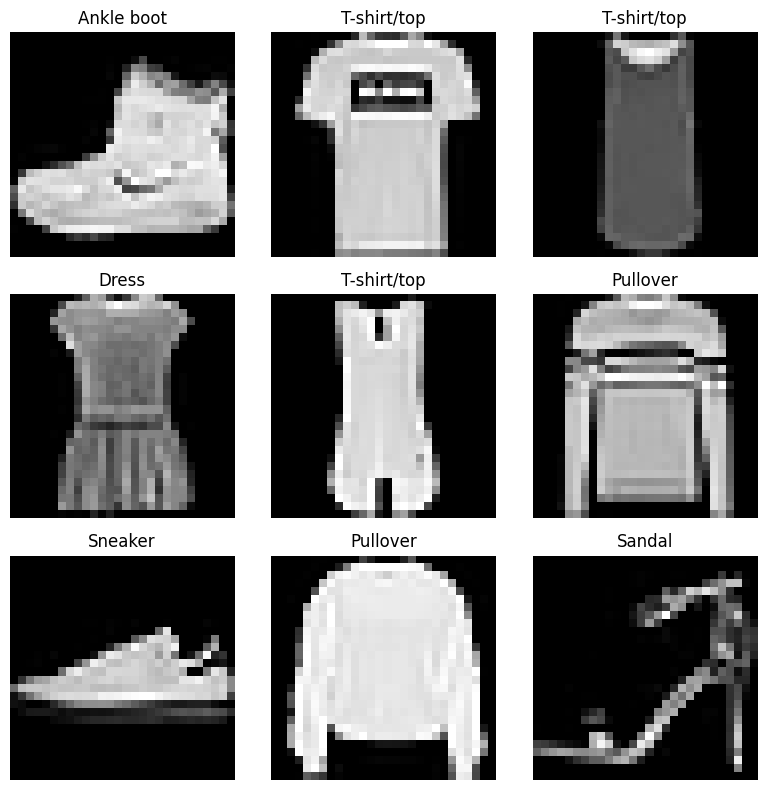

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    image, label = train_set[i]
    image = image.squeeze()  # Quita la dimensión del canal para visualizarla
    ax.imshow(image, cmap="gray")
    ax.set_title(categories[label])
    ax.axis("off")

plt.tight_layout()
plt.show()


**EXTRA**


In [ ]:
img.shape

torch.Size([1, 28, 28])

In [ ]:
image.numpy().squeeze().shape

(28, 28)

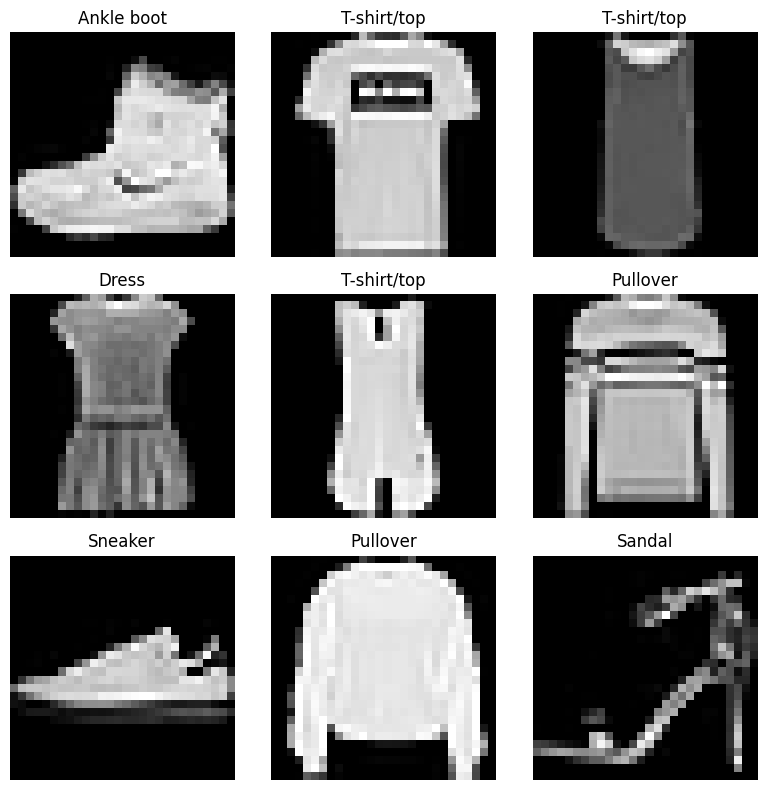

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    image, label = train_set[i]
    image = image.squeeze()  # Quita la dimensión del canal para visualizarla
    ax.imshow(image, cmap="gray")
    ax.set_title(categories[label])
    ax.axis("off")

plt.tight_layout()
plt.show()


## Ejercicio 3)

Creando un `DataLoader` para alimentar el modelo con batchs (lotes) de entrenamiento.

**1)** Cree los `DataLoader`s para cada conjunto. Defínalos con un `batch_size` de 100 y con el flag `shuffle` seteado a `True`.

**2)** Use uno de los `DataLoader`s creados anteriormente para explorar algunos elementos del conjunto.

Notar que, el iterador devuelve el batch en un par `(image,label)`.

El objeto `images` es un tensor de dimensiones `(100,1,28,28)`.
El 100 es el tamaño del batch.
El 1 porque hay un solo canal (en este caso, un canal de escala de grises, pero podría haber varios, p. ej. uno por cada color de {Red, Green Blue} en caso que fuesen imagenes a color).
Luego, 28 y 28 porque cada imagen del dataset es de 28 x 28 píxeles.

El objeto `labels` es un tensor de dimensiones `(100,)`.
La $i$-ésima entrada `labels[i]` de `labels` es un número en $\{0,1,...,9\}$ indicando la categoría a la que pertenece la $i$-ésima imagen en el batch, guardada en `images[i]`.

In [ ]:
# 3.1)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=100, shuffle=True)

EL DATA LOADER es un objeto que va cargando lotes de datos para poder entrenar la red


In [ ]:
len(train_loader.dataset), len(valid_loader.dataset)

(60000, 10000)

In [ ]:
len(train_loader), len(valid_loader)

(600, 100)

In [ ]:
# Obtener un batch de datos del DataLoader
images, labels = next(iter(train_loader))

print("Dimensiones del tensor de imágenes:", images.shape)  # Debería ser torch.Size([100, 1, 28, 28])
print("Dimensiones del tensor de etiquetas:", labels.shape)  # Debería ser torch.Size([100])

# Imprimir las primeras 10 etiquetas del batch para verificar
print("Primeras 10 etiquetas del batch:", labels[:10])


Dimensiones del tensor de imágenes: torch.Size([100, 1, 28, 28])
Dimensiones del tensor de etiquetas: torch.Size([100])
Primeras 10 etiquetas del batch: tensor([1, 6, 3, 9, 1, 4, 2, 1, 7, 6])


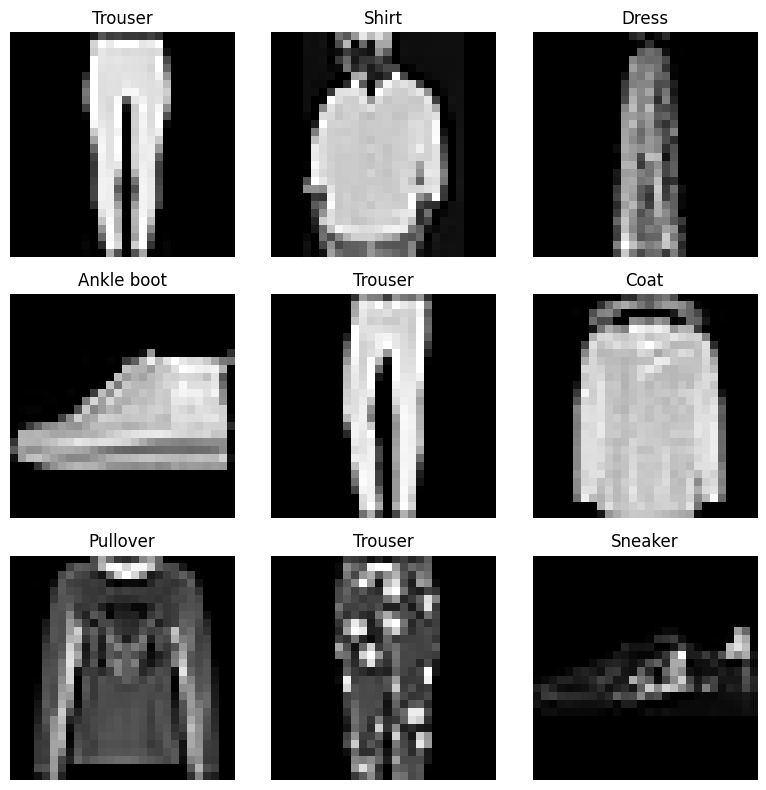

In [ ]:
import matplotlib.pyplot as plt

# Graficar un mosaico 3x3 de las primeras imágenes en el batch
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i].squeeze(), cmap="gray")  # squeeze() para quitar la dimensión extra
    ax.set_title(categories[labels[i].item()])  # .item() para convertir el tensor a int
    ax.axis("off")

plt.tight_layout()
plt.show()


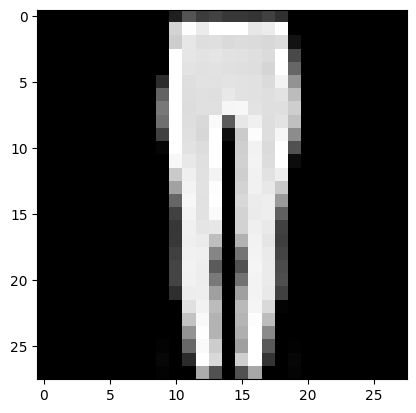

In [ ]:
plt.imshow(images[0].squeeze(), cmap="gray")

## Ejercicio 4)

Defina una red neuronal de 4 capas, una de entrada, dos ocultas de $n_1=128$ y $n_2=64$ neuronas, respectivamente, y una de salida de 10 neuronas.

En las capas intermedias utilice neuronas tipo ReLU y agregueles un *dropout* de p=0.2.
En la capa de salida no utilice funciones de activación ni dropout.

Las capas sucesivas tienen que estar totalmente conectadas entre si.

In [ ]:
# 4)

class NeuralNetwork(nn.Module):
    def __init__(self, n1, n2, p=0.2):
        super(NeuralNetwork, self).__init__()
        #CAPA 0
        self.flatten = nn.Flatten()
        #CAPA 1
        self.fcl = nn.Linear(28*28, n1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p)
        #CAPA 2
        self.fc2 = nn.Linear(n1, n2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p)
        #CAPA 3
        self.fc3 = nn.Linear(n2, 10)

    def forward(self, x):
        #CAPA 0
        x = self.flatten(x)
        #CAPA 1

        x = self.fcl(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        #CAPA2

        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        #CAPA3      No tiene funcion de activacion ni dropout
        x = self.fc3(x)
        return x

In [ ]:
mi_red = NeuralNetwork(128,64)

## Ejercicio 5)

Entrenamos el modelo

**1)** Implemente, en una función, un loop de entrenamiento que recorra los batchs (lotes).

**2)** Implemente, en una función, un loop de validación que recorra los batchs.

**3)** Inicialize dos `DataLoader`s llamados `train_loader` y `valid_loader` a partir del `train_set` (conjunto de entranmiento) y del `valid_set` (conjunto de validación) de Fashion-MNIST, respectivamente, y que usen batchs de 100 ejemplos.

**4)** Cree una función de pérdida usando la **Cross Entropy Loss**.

**IMPORTANTE:** Notar que la **Cross Entropy Loss** aplica automáticamente una `log_softmax`.

**5)** Cree un optimizador que utilice el método de **Stochastic Gradient Descent** con un learning rate igual a $10^{-3}$.

**6)** Cree una instancia del modelo.

**7)** Especifique en que dispositivo (`device`) va a trabajar: en una **CPU** o en una **GPU**.

**8)** Implemente un loop de entrenamiento y validación que trabaje con el `train_loader` y el `valid_loader`, respectivamente, usando un numero arbitrario de épocas.
Este loop debe guardar en cuatro listas los valores de los promedios del **Cross Entropy Loss** y las fracciones de clasificaciones correctas o **precisión** (accuracy) sobre el conjunto de **entrenamiento** y el de **validación**, respectivamente.

**IMPORTANTE:** No olvide copiar los batchs al dispositivo de trabajo.

**9)** Entrene y valide el modelo.

**10)** Use las listas del inciso anterior para graficar en función de las épocas la **Cross Entropy Loss** de **entrenamiento** y de **validación**.
Realize un gráfico análogo pero con la **precisión**.
Discuta y comente, cual es el número óptimo de épocas de entrenamiento?

**11)** Repita los experimentos variando hiperparámetros. Por ejemplo:

- El learning-rate.
- El optimizador (ej. puede usar ADAM).
- El valor de dropout.
- El número de neuronas en las capas intermedias.
- El número de épocas de entrenamiento.
- El tamaño de los lotes.

Discuta los resultados.

Epoch 1
-------------------------------
Train Loss: 0.4123, Train Accuracy: 0.8498
Valid Loss: 0.4612, Valid Accuracy: 0.8325
Epoch 2
-------------------------------
Train Loss: 0.3611, Train Accuracy: 0.8650
Valid Loss: 0.4204, Valid Accuracy: 0.8476
Epoch 3
-------------------------------
Train Loss: 0.3401, Train Accuracy: 0.8746
Valid Loss: 0.4017, Valid Accuracy: 0.8555
Epoch 4
-------------------------------
Train Loss: 0.3171, Train Accuracy: 0.8807
Valid Loss: 0.3792, Valid Accuracy: 0.8635
Epoch 5
-------------------------------
Train Loss: 0.2980, Train Accuracy: 0.8870
Valid Loss: 0.3719, Valid Accuracy: 0.8653
Epoch 6
-------------------------------
Train Loss: 0.3085, Train Accuracy: 0.8872
Valid Loss: 0.3983, Valid Accuracy: 0.8662
Epoch 7
-------------------------------
Train Loss: 0.2934, Train Accuracy: 0.8887
Valid Loss: 0.3863, Valid Accuracy: 0.8620
Epoch 8
-------------------------------
Train Loss: 0.2766, Train Accuracy: 0.8946
Valid Loss: 0.3692, Valid Accuracy:

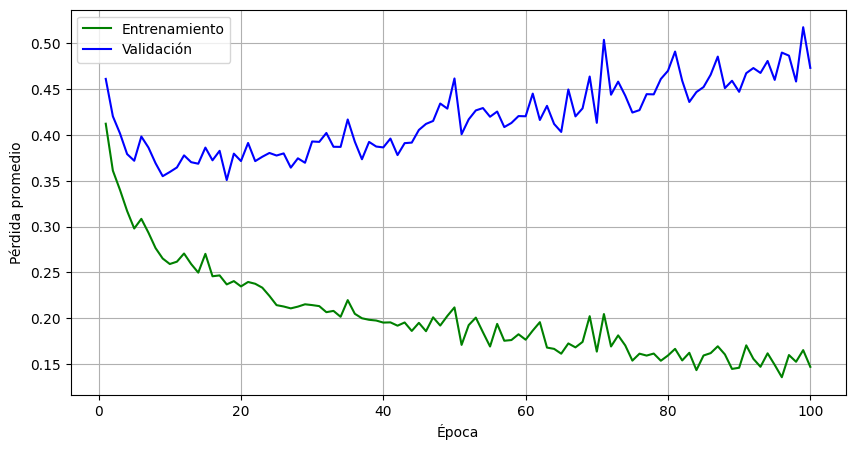

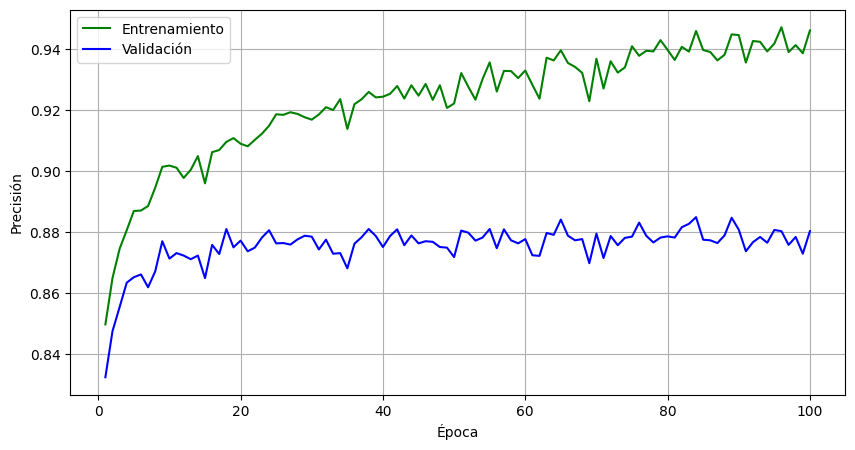

In [ ]:
# Definimos la función de entrenamiento
def train_loop(dataloader, model, loss_fn, optimizer):
    model.train()  # Activamos el modo de entrenamiento
    num_samples = len(dataloader.dataset)
    num_batches = len(dataloader)
    sum_batch_avrg_loss = 0
    sum_correct = 0
    num_processed_samples = 0

    for batch, (X, y) in enumerate(dataloader):
        # Copiamos las entradas y las salidas al dispositivo de trabajo
        X, y = X.to(device), y.to(device)
        batch_size = len(X)

        # Forward pass y cálculo de la pérdida
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backward pass y optimización
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Acumulamos la pérdida y las predicciones correctas
        batch_avrg_loss = loss.item()
        sum_batch_avrg_loss += batch_avrg_loss
        sum_correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        num_processed_samples += batch_size

    # Calculamos las métricas promedio
    avg_loss = sum_batch_avrg_loss / num_batches
    precision = sum_correct / num_samples
    return avg_loss, precision

##############################################################################################################

# Definimos la función de validación
def valid_loop(dataloader, model, loss_fn):
    model.eval()  # Activamos el modo de evaluación


    num_samples = len(dataloader.dataset)
    num_batches = len(dataloader)
    sum_batch_avrg_loss = 0
    sum_correct = 0
    num_processed_samples = 0
    with torch.no_grad():  # No calculamos gradientes
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            batch_size = len(X)
            num_processed_samples += batch_size

            # Forward pass y cálculo de la pérdida
            pred = model(X)
            loss = loss_fn(pred, y)
######################################################################################################################
            # Acumulamos la pérdida y las predicciones correctas
            batch_avrg_loss = loss.item()
            sum_batch_avrg_loss += batch_avrg_loss
            sum_correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            num_processed_samples += batch_size

    # Calculamos las métricas promedio
    avg_loss = sum_batch_avrg_loss / num_batches
    precision = sum_correct / num_samples
    return avg_loss, precision


# Configuramos los DataLoaders
batch_size = 500
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size, shuffle=False)

# Configuramos la pérdida, modelo y optimizador
loss_fn = nn.CrossEntropyLoss()
n1, n2, p = 128, 64, 0.05
model = NeuralNetwork(n1, n2, p=p)
learning_rate = 10e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Configuramos el dispositivo
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Inicializamos listas para guardar métricas
list_train_avg_loss_incorrecta = []
list_train_avg_loss = []
list_valid_avg_loss = []
list_train_precision_incorrecta = []
list_train_precision = []
list_valid_precision = []

# Ciclo de entrenamiento
num_epochs = 100
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}\n-------------------------------")

    # Entrenamos y validamos
    train_avg_loss_incorrecta, train_precision_incorrecta = train_loop(train_loader, model, loss_fn, optimizer)
    train_avg_loss, train_precision = valid_loop(train_loader, model, loss_fn)
    valid_avg_loss, valid_precision = valid_loop(valid_loader, model, loss_fn)

    # Guardamos las métricas
    list_train_avg_loss_incorrecta.append(train_avg_loss_incorrecta)
    list_train_avg_loss.append(train_avg_loss)
    list_valid_avg_loss.append(valid_avg_loss)
    list_train_precision_incorrecta.append(train_precision_incorrecta)
    list_train_precision.append(train_precision)
    list_valid_precision.append(valid_precision)


    print(f"Train Loss: {train_avg_loss:.4f}, Train Accuracy: {train_precision:.4f}")
    print(f"Valid Loss: {valid_avg_loss:.4f}, Valid Accuracy: {valid_precision:.4f}")

print("Entrenamiento finalizado!")


import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), list_train_avg_loss, label="Entrenamiento", color="green")
plt.plot(range(1, num_epochs + 1), list_valid_avg_loss, label="Validación", color="blue")
plt.xlabel("Época")
plt.ylabel("Pérdida promedio")
#plt.title("Pérdida vs Época")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), list_train_precision, label="Entrenamiento", color="green")
plt.plot(range(1, num_epochs + 1), list_valid_precision, label="Validación", color="blue")
plt.xlabel("Época")
plt.ylabel("Precisión")
#plt.title("Precisión vs Época")
plt.legend()
plt.grid(True)
plt.show()
